# Car Price Prediction 

**This Jupyter Notebook was created by  [Dajah Vincent](https://www.linkedin.com/in/dajahvincent/)**

* Adding Data Manipulation and Visualization Libraries

In [64]:
#Importing data manipulation and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

* Reading the csv data

In [65]:
#Reading the CSV file containing the datasets
car_price = pd.read_csv("car data.csv")

In [66]:
#Viewing the first 10 rows from the dataset
car_price.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [67]:
#Viewing the last 10 rows from the dataset
car_price.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


**Exploratory Data Analysis - EDA**

In [68]:
#Viewing quick overview of the datasets containing numerical values
car_price.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [69]:
#Viewing informations about the dataframe 
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [70]:
#Checking the sum of columns that have null or empty values
car_price.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [71]:
#Checking the dataframe for rows with duplicated values
car_price.duplicated().sum()

2

In [72]:
#Dropping rows with duplicated values from the dataframe
car_price.drop_duplicates(inplace=True)

In [73]:
#Rechecking the dataframe for rows with duplicated values
car_price.duplicated().sum()

0

* Adding Visualization

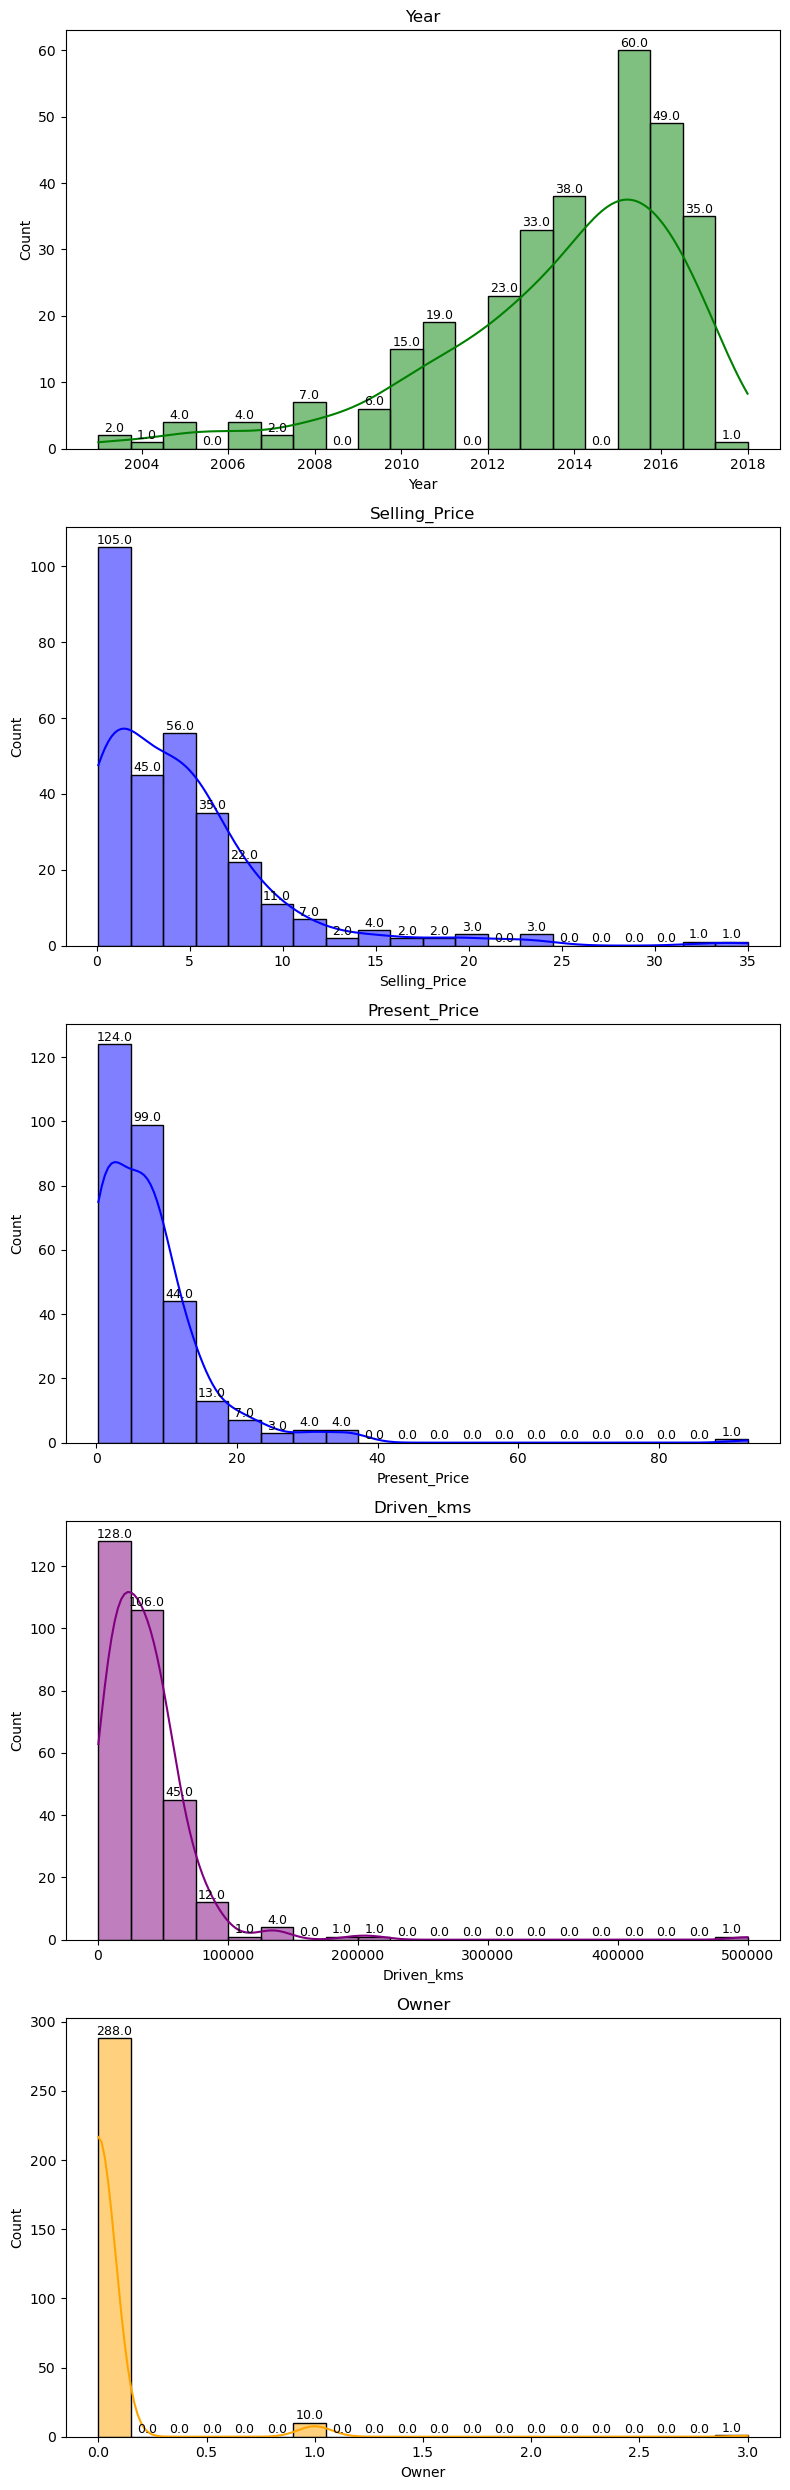

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histograms(data, features, colors):
    # Create a figure with appropriate size
    plt.figure(figsize=(8, len(features) * 5))
    
    # Loop over each feature to create a subplot with a unique color
    for index, feature in enumerate(features):
        plt.subplot(len(features), 1, index + 1)
        ax = sns.histplot(data[feature], bins=20, kde=True, color=colors[index])
        plt.title(feature)
        
        # Add labels to each bar
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.1f}", 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        fontsize=9, color='black', 
                        xytext=(0, 5),
                        textcoords='offset points')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage:
# Assuming 'car_price' is a pandas DataFrame containing the data
plot_histograms(car_price, ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'], ['green', 'blue', 'blue', 'purple', 'orange'])


* Feature Engineering 

In [75]:
category_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
unique_categories = {col: car_price[col].unique() for col in category_cols}

# Print the unique categories for each column
for col, categories in unique_categories.items():
    print(f"Category in {col} is: {categories}")


Category in Fuel_Type is: ['Petrol' 'Diesel' 'CNG']
Category in Selling_type is: ['Dealer' 'Individual']
Category in Transmission is: ['Manual' 'Automatic']


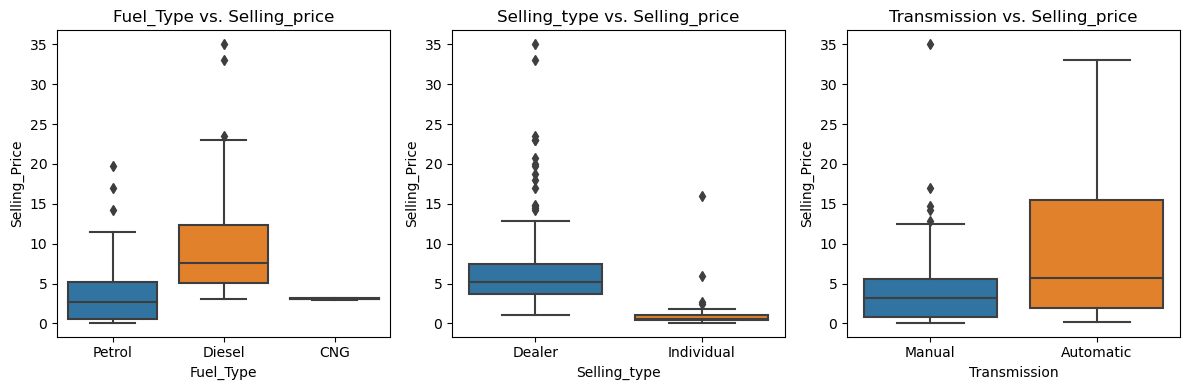

In [76]:
def plot_categorical_features_vs_price(dataframe, category_columns, price_column):
    # Check if all category columns and price column exist in the dataframe
    missing_columns = [col for col in category_columns + [price_column] if col not in dataframe.columns]
    if missing_columns:
        print(f"Warning: The following columns are missing from the dataframe: {missing_columns}")
        return

    # Create subplots
    num_plots = len(category_columns)
    num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed
    plt.figure(figsize=(12, num_rows * 4))

    # Loop through each categorical column and plot
    for i, feature in enumerate(category_columns):
        plt.subplot(num_rows, 3, i + 1)
        sns.boxplot(data=dataframe, x=feature, y=price_column)
        plt.title(f'{feature} vs. {price_column.capitalize()}')

    plt.tight_layout()
    plt.show()

# Example usage:
plot_categorical_features_vs_price(car_price, category_cols, 'Selling_Price')

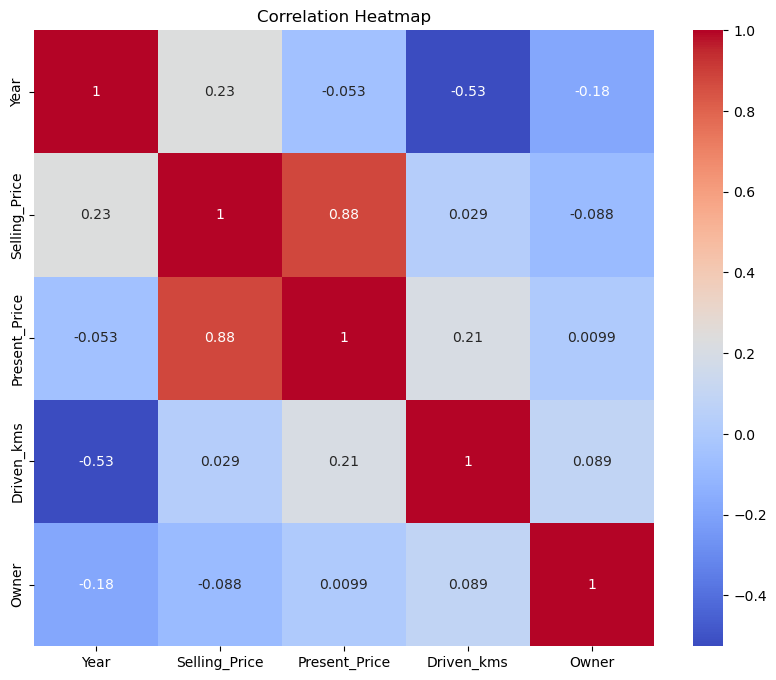

In [77]:

def plot_correlation_heatmap(dataframe, numerical_features):
    # Check if all numerical features exist in the dataframe
    missing_columns = [col for col in numerical_features if col not in dataframe.columns]
    if missing_columns:
        print(f"Warning: The following columns are missing from the dataframe: {missing_columns}")
        return

    # Calculate the correlation matrix
    correlation_matrix = dataframe[numerical_features].corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Example usage:
# Assuming 'df' is a pandas DataFrame with the specified numerical features
numerical_features = ["Year", "Selling_Price", "Present_Price", "Driven_kms", "Owner"]
plot_correlation_heatmap(car_price, numerical_features)


**Features Engineering** 

In [78]:
def encode_categorical_variables(dataframe, categorical_columns):
    
    label_encoder = LabelEncoder()
    for column in categorical_columns:
        dataframe[column] = label_encoder.fit_transform(dataframe[column])
    
    return dataframe

# Example usage:
# Assuming 'df' is a pandas DataFrame with categorical columns
categorical_columns = ['Fuel_Type', 'Selling_type', 'Transmission']
encoded_df = encode_categorical_variables(car_price, categorical_columns)

numerical_columns = ['Year', 'Present_Price', 'Driven_kms', 'Owner']
# Feature scaling
scaler = StandardScaler()
car_price[numerical_columns] = scaler.fit_transform(car_price[numerical_columns])
car_price

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,0.132992,3.35,-0.228138,-0.254603,2,0,1,-0.175101
1,sx4,-0.212787,4.75,0.233742,0.156181,1,0,1,-0.175101
2,ciaz,1.170329,7.25,0.269991,-0.770651,2,0,1,-0.175101
3,wagon r,-0.904345,2.85,-0.396520,-0.814297,2,0,1,-0.175101
4,swift,0.132992,4.60,-0.078466,0.142061,1,0,1,-0.175101
...,...,...,...,...,...,...,...,...,...
296,city,0.824550,9.50,0.474622,-0.075193,1,0,1,-0.175101
297,brio,0.478771,4.00,-0.191889,0.592640,2,0,1,-0.175101
298,city,-1.595904,3.35,0.404463,1.309818,2,0,1,-0.175101
299,city,1.170329,11.50,0.579860,-0.716735,1,0,1,-0.175101


In [79]:
def scale_numerical_features(dataframe, numerical_columns):
   
    scaler = StandardScaler()
    dataframe[numerical_columns] = scaler.fit_transform(dataframe[numerical_columns])
    return dataframe

# Example usage:
numerical_columns = ['Year', 'Present_Price', 'Driven_kms', 'Owner']
scaled_df = scale_numerical_features(car_price, numerical_columns)
scaled_df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,0.132992,3.35,-0.228138,-0.254603,2,0,1,-0.175101
1,sx4,-0.212787,4.75,0.233742,0.156181,1,0,1,-0.175101
2,ciaz,1.170329,7.25,0.269991,-0.770651,2,0,1,-0.175101
3,wagon r,-0.904345,2.85,-0.396520,-0.814297,2,0,1,-0.175101
4,swift,0.132992,4.60,-0.078466,0.142061,1,0,1,-0.175101
...,...,...,...,...,...,...,...,...,...
296,city,0.824550,9.50,0.474622,-0.075193,1,0,1,-0.175101
297,brio,0.478771,4.00,-0.191889,0.592640,2,0,1,-0.175101
298,city,-1.595904,3.35,0.404463,1.309818,2,0,1,-0.175101
299,city,1.170329,11.50,0.579860,-0.716735,1,0,1,-0.175101


**Machine Learning Model Training & Evaluation** 

In [80]:
#importing machine learning models and evaluation metrics 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tabulate import tabulate


In [81]:
#Split the data into features (X) and target (y)
X = car_price.drop(['Selling_Price', 'Car_Name'], axis = 1)
y = car_price['Selling_Price']

#To split the datasets between training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#Initializing Linear Regression model
model = LinearRegression()

#Fitting the model to the training data
model.fit(X_train, y_train)

#Making predictions on the testing dataset
y_predict = model.predict(X_test)

#Evaluating the model performance
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2_square = r2_score(y_test, y_predict)

#Creating a table using the tabulate library to efficiently display the models evaluation results
results_table = [
    ["R-squared", r2_square],
    ["Mean Squared Error", mse],
    ["Mean Absolute Error", mae]
]

# Print the results in a tabulated format
print(tabulate(results_table, headers=["Metric", "Value"], tablefmt="grid"))


+---------------------+----------+
| Metric              |    Value |
+=====================+==========+
| R-squared           | 0.778644 |
+---------------------+----------+
| Mean Squared Error  | 4.37759  |
+---------------------+----------+
| Mean Absolute Error | 1.29518  |
+---------------------+----------+


**Making Predictions of Car Prices Against Actual Car Price**

In [82]:
pred_df = pd.DataFrame({'Actual Price Value':y_test,'Predicted Price Value':y_predict,'Variance':y_test-y_predict})
pred_df

,Actual Price Value,Predicted Price Value,Variance
283,8.99,7.552126,1.437874
267,8.35,7.494551,0.855449
166,0.45,1.286506,-0.836506
9,7.45,6.788805,0.661195
78,5.25,11.716672,-6.466672
...,...,...,...
126,0.90,1.808141,-0.908141
141,0.60,1.273614,-0.673614
154,0.50,0.687647,-0.187647
206,5.75,5.840494,-0.090494


In [83]:
#Importing the random and tabulate libraries to pick datapoints and show predictions results
import random
from tabulate import tabulate

#Create a DataFrame with the relevant columns
pred_df = pd.DataFrame({
    'Actual Price Value': y_test,
    'Predicted Price Value': y_predict,
    'Variance': y_test - y_predict
})

#Randomly sampling data points for the predictions (10 data points)
random_indices = random.sample(range(len(pred_df)), 10)
sampled_pred_df = pred_df.iloc[random_indices]

#Create a table to display the sampled results
results_table = [
    ["Index", "Actual Price", "Predicted Price", "Variance"]
]
for idx, row in sampled_pred_df.iterrows():
    results_table.append([idx, f"{row['Actual Price Value']:.3f}", f"{row['Predicted Price Value']:.3f}", f"{row['Variance']:.2f}"])

print(tabulate(results_table, headers="firstrow", tablefmt="grid"))


+---------+----------------+-------------------+------------+
|   Index |   Actual Price |   Predicted Price |   Variance |
+=========+================+===================+============+
|      61 |           4.5  |             5.211 |      -0.71 |
+---------+----------------+-------------------+------------+
|     145 |           0.6  |            -0.111 |       0.71 |
+---------+----------------+-------------------+------------+
|      46 |           2.65 |             3.133 |      -0.48 |
+---------+----------------+-------------------+------------+
|      83 |          12.5  |             8.798 |       3.7  |
+---------+----------------+-------------------+------------+
|     131 |           0.75 |             0.946 |      -0.2  |
+---------+----------------+-------------------+------------+
|     206 |           5.75 |             5.84  |      -0.09 |
+---------+----------------+-------------------+------------+
|      19 |           2.65 |             3.583 |      -0.93 |
+-------

Thanks for your time